In [ ]:

# ? identification des valeurs invalides. ... pas clair qu'il y en a tant que cas 
# ? degree invalidite. 




import pandas as pd 
from utils.utils import distributional_summary, degree_completeness, degree_validity, SerieValidityMapper
import matplotlib.pyplot as plt


df_data = pd.read_csv('data/lending_club_loans.csv') 
labels = pd.read_excel('data/lending_club_data_dic.xlsx') 


ref_encoding = { 
  'cid': {},    # Not empty string 
  'fname': {},  # Not empty string 
  'lname': {},  # Not empty string 
  'sex': {"F":"Female", "M":'Male'},    # Not empty string 
  'bday': {},   # correct date format 
  'phone': {},  # regex 
  'email': {},  # regex testing 
  'address': {}, # Not empty string 
  'pcode': {},  # regex testing 
  'region': {}, # must be in list of region 
} 

validity_mapper:SerieValidityMapper = { 
  'cid': lambda df,c:pd.notnull(df[c]),    # Not empty string 
  'fname': lambda df,c:pd.notnull(df[c]),  # Not empty string 
  'lname': lambda df,c:pd.notnull(df[c]),  # Not empty string 
  'sex': lambda df,c:pd.notnull(df[c]),    # Not empty string 
  'bday': lambda df,c:pd.notnull(df[c]),   # correct date format 
  'phone': lambda df,c:pd.notnull(df[c]),  # regex 
  'email': lambda df,c:pd.notnull(df[c]),  # regex testing 
  'address': lambda df,c:pd.notnull(df[c]), # Not empty string 
  'pcode': lambda df,c:pd.notnull(df[c]),  # regex testing 
  'region': lambda df,c:pd.notnull(df[c]), # must be in list of region 
} 


def convert_percentage(serie:pd.Series):
  return [ float(str(v).replace('%', '')) for v in serie.values]

def convert_date(serie:pd.Series): 
  return pd.to_datetime(serie, format='%b-%y') 


def delta_month(d1:pd.Series, d2:pd.Series):
	return ( (d1.dt.year - d2.dt.year) * 12 + (d1.dt.month - d2.dt.month) ).astype('Int64')




In [62]:

summary = distributional_summary(df_data) 

id_varnames = ['id', 'member_id'] 
varname_cardinality_1 = summary.loc[:, summary.loc['cardinality'] == 1].columns # ! to document. 

v_completeness = degree_completeness(df_data) 
h_completeness = degree_completeness(df_data, axis=1) 



Encoding

In [89]:

df = df_data.copy()
# ! subgrade
#df['_sub_grade'] = [ int(str(v)[1]) for v in df['sub_grade']] 
#df['_sub_grade'].unique() 

cat_var = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'addr_state']

encodings = {
  'emp_length':{
    0: '< 1 year',
    1: '1 year',
    2: '2 years',
    3: '3 years',
    4: '4 years',
    5: '5 years',
    6: '6 years',
    7: '7 years',
    8: '8 years',
    9: '9 years',
    10: '10+ years'}
}
for c in cat_var:
	encodings[c] = { i:v for i,v in enumerate(sorted(df[c].unique()))}

# encodings


In [63]:
summary_str = summary.loc[:, summary.loc['type']=='string']

summary_str[ [ c for c in summary_str.columns if c not in [*varname_cardinality_1, *id_varnames] ] ]


,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
type,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string
dtype,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
N,39786,39786,39786,39786,39786,39786,39786,39786,39786,39786,39786,39786,39786,39786,39786
count,39786,39786,39786,39786,38708,39786,39786,39786,39786,39786,39786,39786,39736,39715,39784
missing_p,0.0,0.0,0.0,0.0,0.027095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001257,0.001785,0.00005
cardinality,2,371,7,35,11,5,3,55,7,823,50,526,1089,109,114
unique_p,0.0,0.000427,0.0,0.0,0.0,0.0,0.0,0.000025,0.000075,0.001382,0.0,0.000829,0.00224,0.000025,0.000151
most_freq,36 months,10.99%,B,B3,10+ years,RENT,Not Verified,Dec-11,Fully Paid,100xx,CA,Nov-98,0%,Mar-13,Jan-17
least_freq,60 months,16.71%,G,G5,9 years,NONE,Source Verified,Jun-07,Late (16-30 days),414xx,ME,Jul-64,8.01%,Feb-08,Jun-08
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TRANSFORMATIONS

In [66]:

df = df_data.copy()

# ! convert percentage int_rate, revol_util
df['int_rate_'] = convert_percentage(df['int_rate'])
df['revol_util_'] = convert_percentage(df['revol_util'])
df['revol_util_']

# ! convert dates last_pymnt_d, last_credit_pull_d, earliest_cr_line, issue_d
date_varnames = ['last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line', 'issue_d'] 
for c in date_varnames:
	df[f"_{c}"] = convert_date(df[c])


# ? d1, d2 = df_data[f"_last_pymnt_d"], df_data[f"_earliest_cr_line"]
# ? delta_month(d1, d2)




Box plot and possible outliers

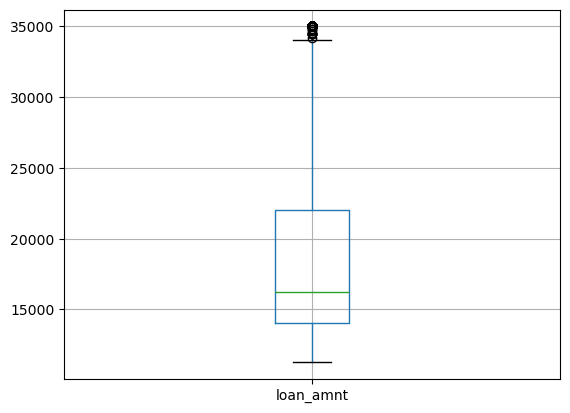

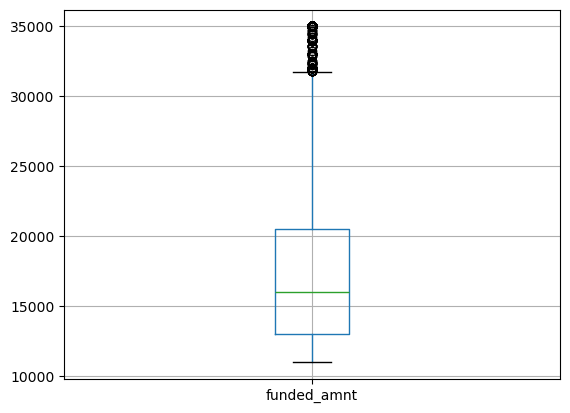

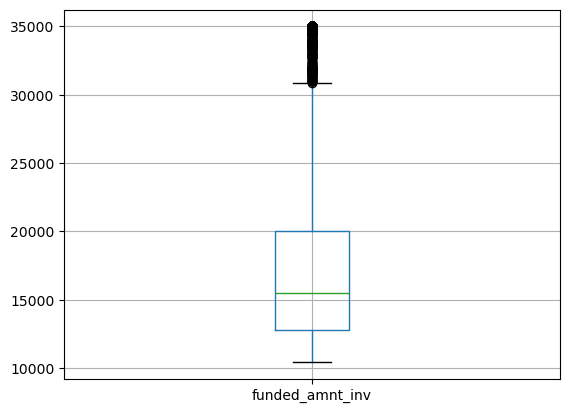

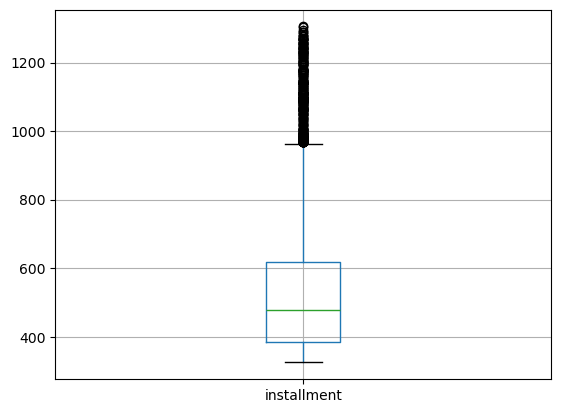

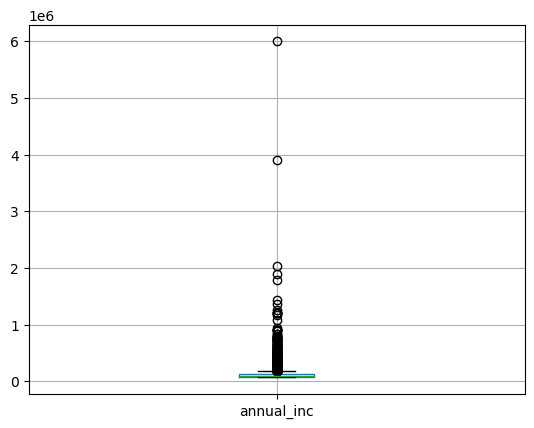

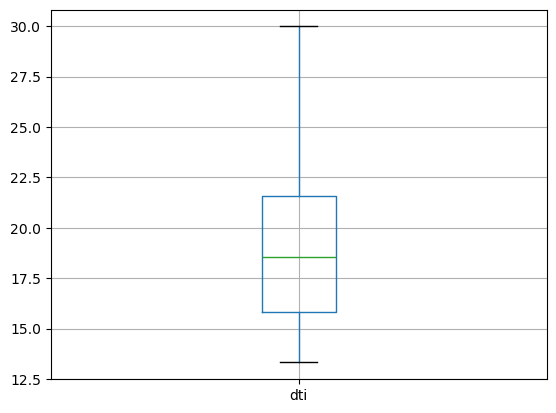

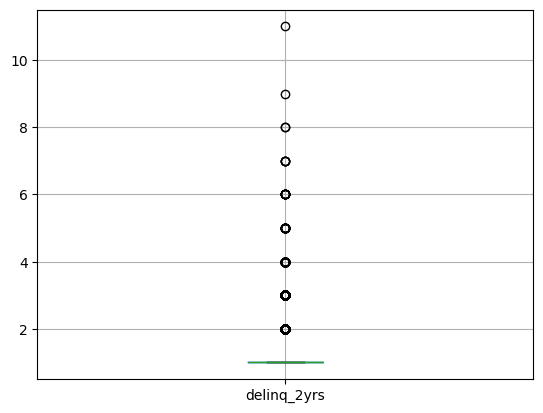

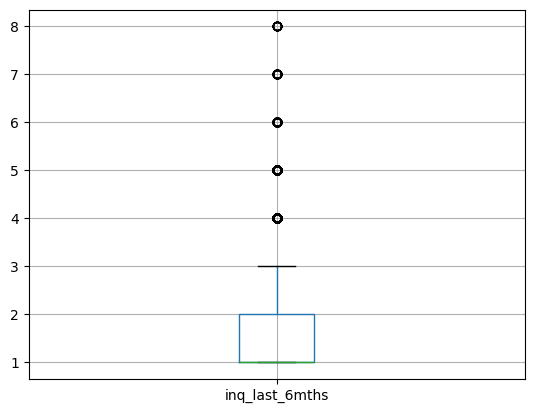

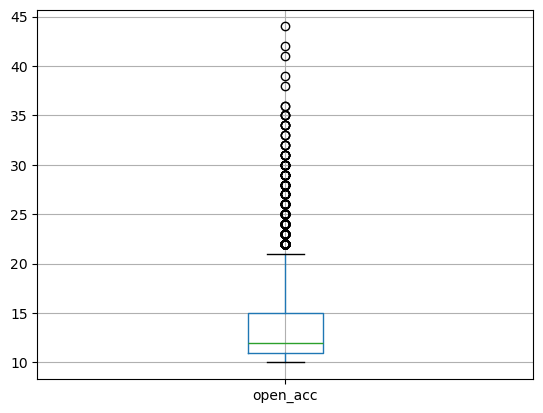

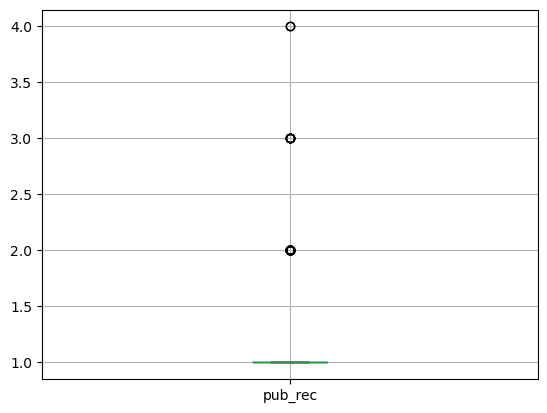

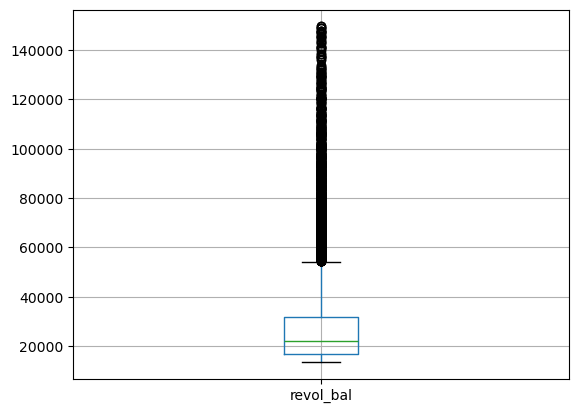

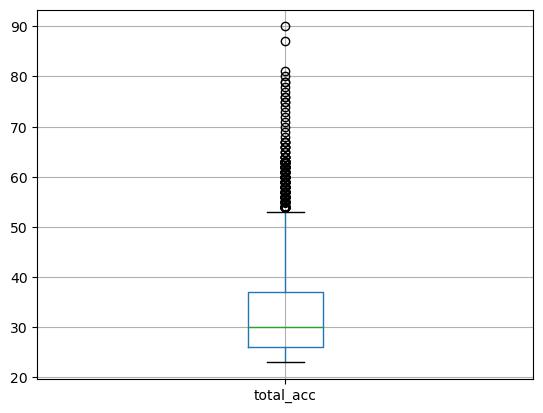

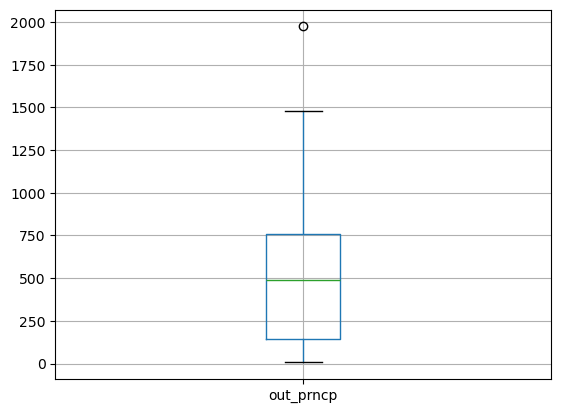

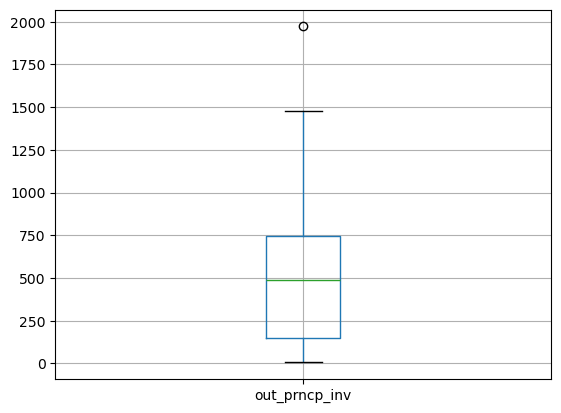

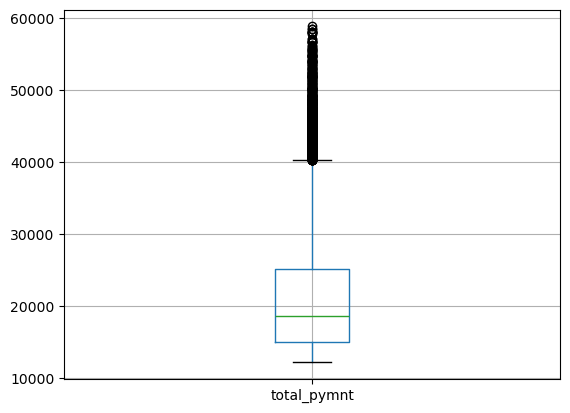

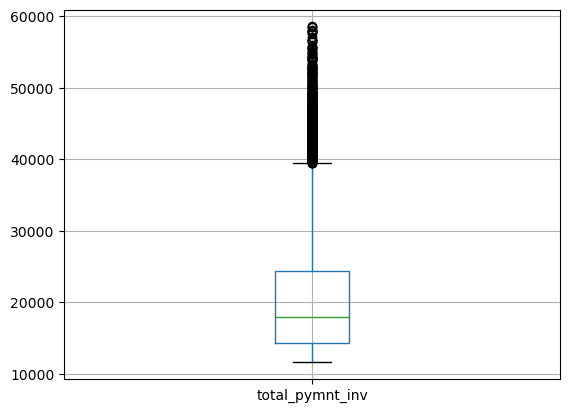

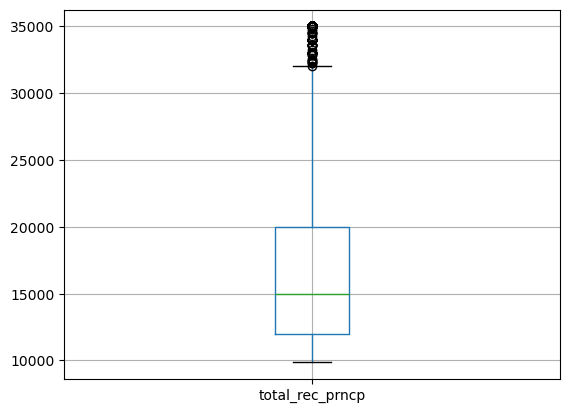

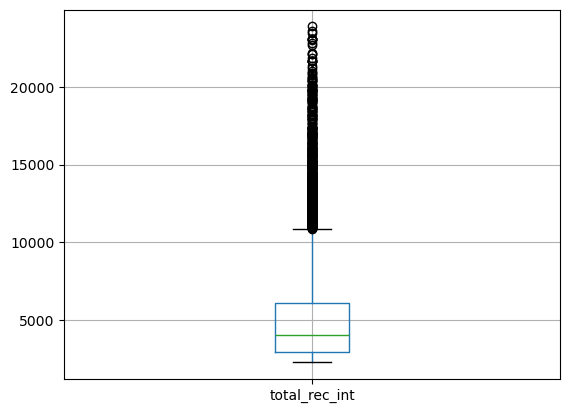

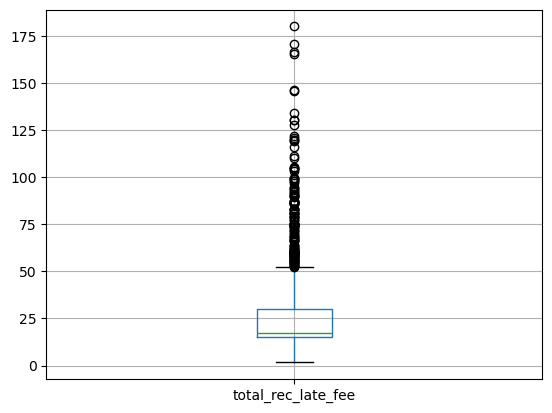

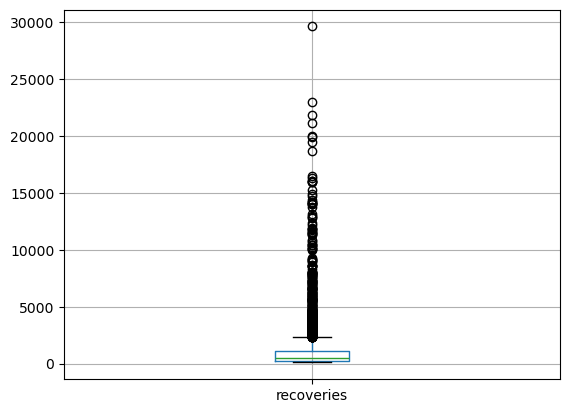

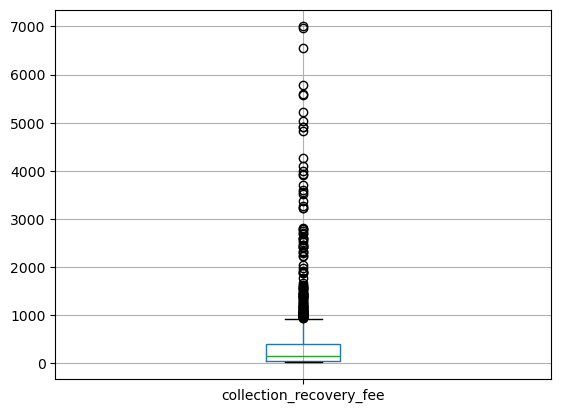

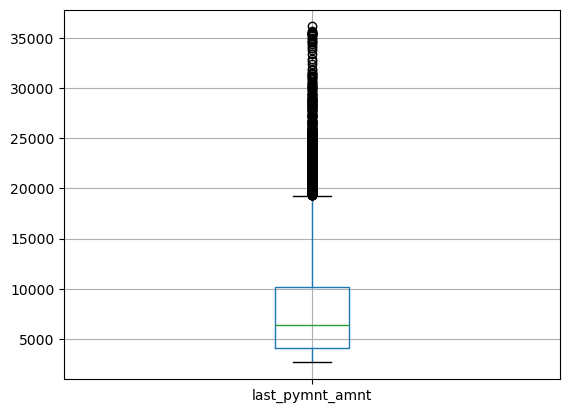

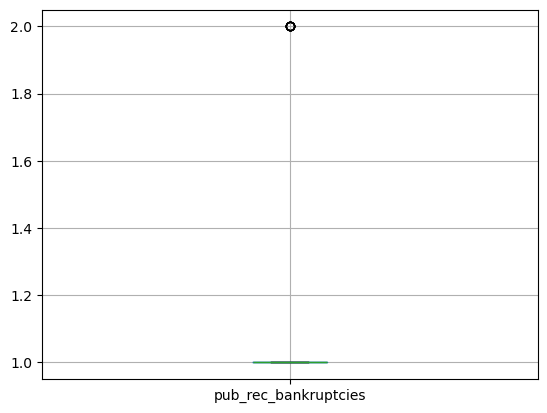

In [57]:

# ? abherant value would be found on numerical variables with high cardinality, most likely. 



summary_num = summary.loc[:, summary.loc['type'] == 'numerical'] 
# ! Removes from summary id variables, non-numerical, with cardinality of 1 
summary_num = summary[ [ c for c in summary_num.columns if c not in [*varname_cardinality_1, *id_varnames] ] ] 
varnames = summary_num.columns


# ! POssible invalid values
# funded_amnt_inv: 0.0
# dti: 0.0 
# delinq_2yrs  # ? distribution scewed. Some outliers, severe delinquent
# inq_last_6mths # ? distribution scewed. Some outliers, severe delinquent
# open_acc # ? some
# revol_bal # ? outliers in higher hand?
# total_acc # Outliers above 80 ?
# out_prncp, out_prncp_inv, # ? possible outliers in values above ~500 ?
# annual_inc # ! some severe outliers in the millions? 
# Total_rec_int # ? values above 15'000 
# total_rec_late_fee # ? values above 100 
# recoveries # ? values above ~15'000 
# collection_recovery_fee # ? 3000

# exclude values with means near 0 

# ! 
for c in varnames:
	mu = df_data[c].mean()
	df = df_data[ df_data[c] > mu][[c]]
	df.boxplot(column=c)
	plt.show()
